<span style="color:#87CEEB; font-size:30px; font-weight:bold;">Prueba - Análisis Estadístico con Python</span><br>
<span style="font-size:15px;">Marcela Alejandra Barrera Puentes</span>

<span style="font-size:15px;">En esta prueba validaremos los conocimientos adquiridos durante este módulo.</span>

<span style="color:#87CEEB; font-size:20px; font-weight:bold;">Descripción</span><br>
<span style="font-size:15px;">La OMS estima que cada año se producen 12 millones de muertes en todo el mundo debido a enfermedades cardíacas, producidas en su gran mayoría por enfermedades cardiovasculares. El pronóstico temprano de las enfermedades cardiovasculares puede ayudar en la toma de decisiones sobre cambios en el estilo de vida en pacientes de alto riesgo y reducir las complicaciones.
La base de datos cardio.csv contiene mediciones realizadas a pacientes hace 10 años, entre los cuales se encuentran<br>0. Sex:M-F<br>1. Age: edad<br>2.Education: codificada, considerando que un valor más alto corresponde a un mayor
nivel educativo<br>3. currentSmoker: si el paciente es o no fumador actual<br>
4. cigsPerDay: el número de cigarrillos que la persona fumaba en promedio en un día<br>
5. BPMeds: si el paciente estaba tomando medicamentos para la presión arterial (0: No,
1: Sí)<br>
6. prevalentStroke: si el paciente había tenido un accidente cerebrovascular previamente
(0: No, 1: Sí)<br>
7. prevalentHyp: si el paciente era hipertenso o no (0: No, 1: Sí)<br>
8. diabetes: si el paciente tenía diabetes o no (0: No, 1: Sí)<br>
9. totChol: nivel de colesterol total<br>
10. sysBP: presión arterial sistólica<br>
11. diaBP_BMI: presión arterial diastólica<br>
12. BMI: Índice de masa corporal<br>
13. heartRate: : ritmo cardíaco<br>
14. glucose: nivel de glucosa<br>
15. TenYearCHD: se indica si el paciente sufrió o no una enfermedad coronaria en los últimos 10 años.(0: No, 1: Sí)<br>
</span>

In [539]:
# Se importa librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
from statistics import mode
from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")



# Se crea un colormap personalizado
colores_base = ["#ADD8E6", "#E0BBE4", "#957DAD", "#D291BC", "#F4B3C2"]
paleta_gradual = LinearSegmentedColormap.from_list("PastelGradual", colores_base, N=20)
# Se lee el archivo csv: cardio.csv
df_base = pd.read_csv('/Users/marce/Projects_Marce/Desafio_Latam/cardio.csv', delimiter = ',')

<span style="color:#87CEEB; font-size:20px; font-weight:bold;">1.</span>
<span style="font-size:15px;">Carga los datos y explóralos. Elimina los datos nulos o incorrectos.</span><br>

In [478]:
# Columnas a estandarizar
columnas_yes_no = ['BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes','TenYearCHD']
# Se reemplaza 0 por 'No' y 1 por 'Yes' solo en las columnas especificadas
df_base[columnas_yes_no] = df_base[columnas_yes_no].replace({0: 'No', 1: 'Yes'})
df_yes_no = df_base.copy()

In [480]:
# Se determinan valores nulos
df_yes_no.apply(lambda x: sum(x.isnull()), axis=0)

sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<span style="font-size:15px;">Se observa que 7 variables contienen registros nulos: education, cigsPerDay, BPMeds, totChol, BMI, hearRate, glucose. Siendo glucose y education los campos que más datos nulos contienen: 388 y  105 respectivamente</span>

In [483]:
# Buena práctica: se observa el tipo de datos
df_yes_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   object 
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   object 
 8   diabetes         4238 non-null   object 
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   object 
dtypes: float64(8), int64(1), object(7)
memory usage: 529.9+ KB


<span style="font-size:15px;">Se observa que 09 de las 16 columnas son del tipo de dato int64  o float64 y 7 campos son tipo object.
Se confirman datos omitidos dentro de los registros. Los campos que tienen más registros alcanzan los 4.238, mientras que
los que registran menos data contienen 3.850 registros</span>

In [486]:
# Buena práctica: se da una mirada a las primeras filas del DataFrame y las columnas que lo conforman
print(df_yes_no.head())

  sex  age  education currentSmoker  cigsPerDay BPMeds prevalentStroke  \
0   M   39        4.0            No         0.0     No              No   
1   F   46        2.0            No         0.0     No              No   
2   M   48        1.0           Yes        20.0     No              No   
3   F   61        3.0           Yes        30.0     No              No   
4   F   46        3.0           Yes        23.0     No              No   

  prevalentHyp diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0           No       No    195.0  106.0   70.0  26.97       80.0     77.0   
1           No       No    250.0  121.0   81.0  28.73       95.0     76.0   
2           No       No    245.0  127.5   80.0  25.34       75.0     70.0   
3          Yes       No    225.0  150.0   95.0  28.58       65.0    103.0   
4           No       No    285.0  130.0   84.0  23.10       85.0     85.0   

  TenYearCHD  
0         No  
1         No  
2         No  
3        Yes  
4         No  


In [488]:
# Buena práctica se determina cuántas filas y columnas tiene el set de datos
df_yes_no.shape

(4238, 16)

In [490]:
# Buena práctica: se genera un resumen estadístico para las 09 columnas numéricas con df.describe()
df_yes_no.describe()

,age,education,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.000000,4133.000000,4209.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000
mean,49.584946,1.978950,9.003089,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753
std,8.572160,1.019791,11.920094,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998
min,32.000000,1.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,1.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000
50%,49.000000,2.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,3.000000,20.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000
max,70.000000,4.000000,70.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


<span style="font-size:15px;">En promedio, sin haber realizado limpieza de datos:<br>
[1] la edad es casi 50 años<br>
[2] nivel educativo en torno a 2, con un nivel máximo de 4<br>
[3] 9 cigarrillos fuman en un día promedio<br>
[4] nivel de colesterol 236,72 <br>
[5] presión arterial sistólica 132,35 <br>
[6] presión arterial diastólica 82,89<br>
[7] índice de masa corporal 25,80<br>
[8] ritmo cardiaco 75,88<br>
[9] nivel de glucosa 81,97<br>
</span>

In [493]:
# Se crea un DataFrame sin nulos
df_sin_nulos = df_yes_no.dropna()
# Se determinan valores nulos en df_sin_nulos
df_sin_nulos.apply(lambda x: sum(x.isnull()), axis=0)

sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [495]:
# Se determinan cuántas filas y columnas quedan luego de eliminar los nulos
df_sin_nulos.shape

(3656, 16)

<span style="color:#87CEEB; font-size:20px; font-weight:bold;">2.</span>
<span style="font-size:15px;">Escoge tres variables cuantitativas y realiza un análisis descriptivo de ellas,
utilizando indicadores y gráficos. ¿Cuaĺ presenta mayor dispersión?</span><br>

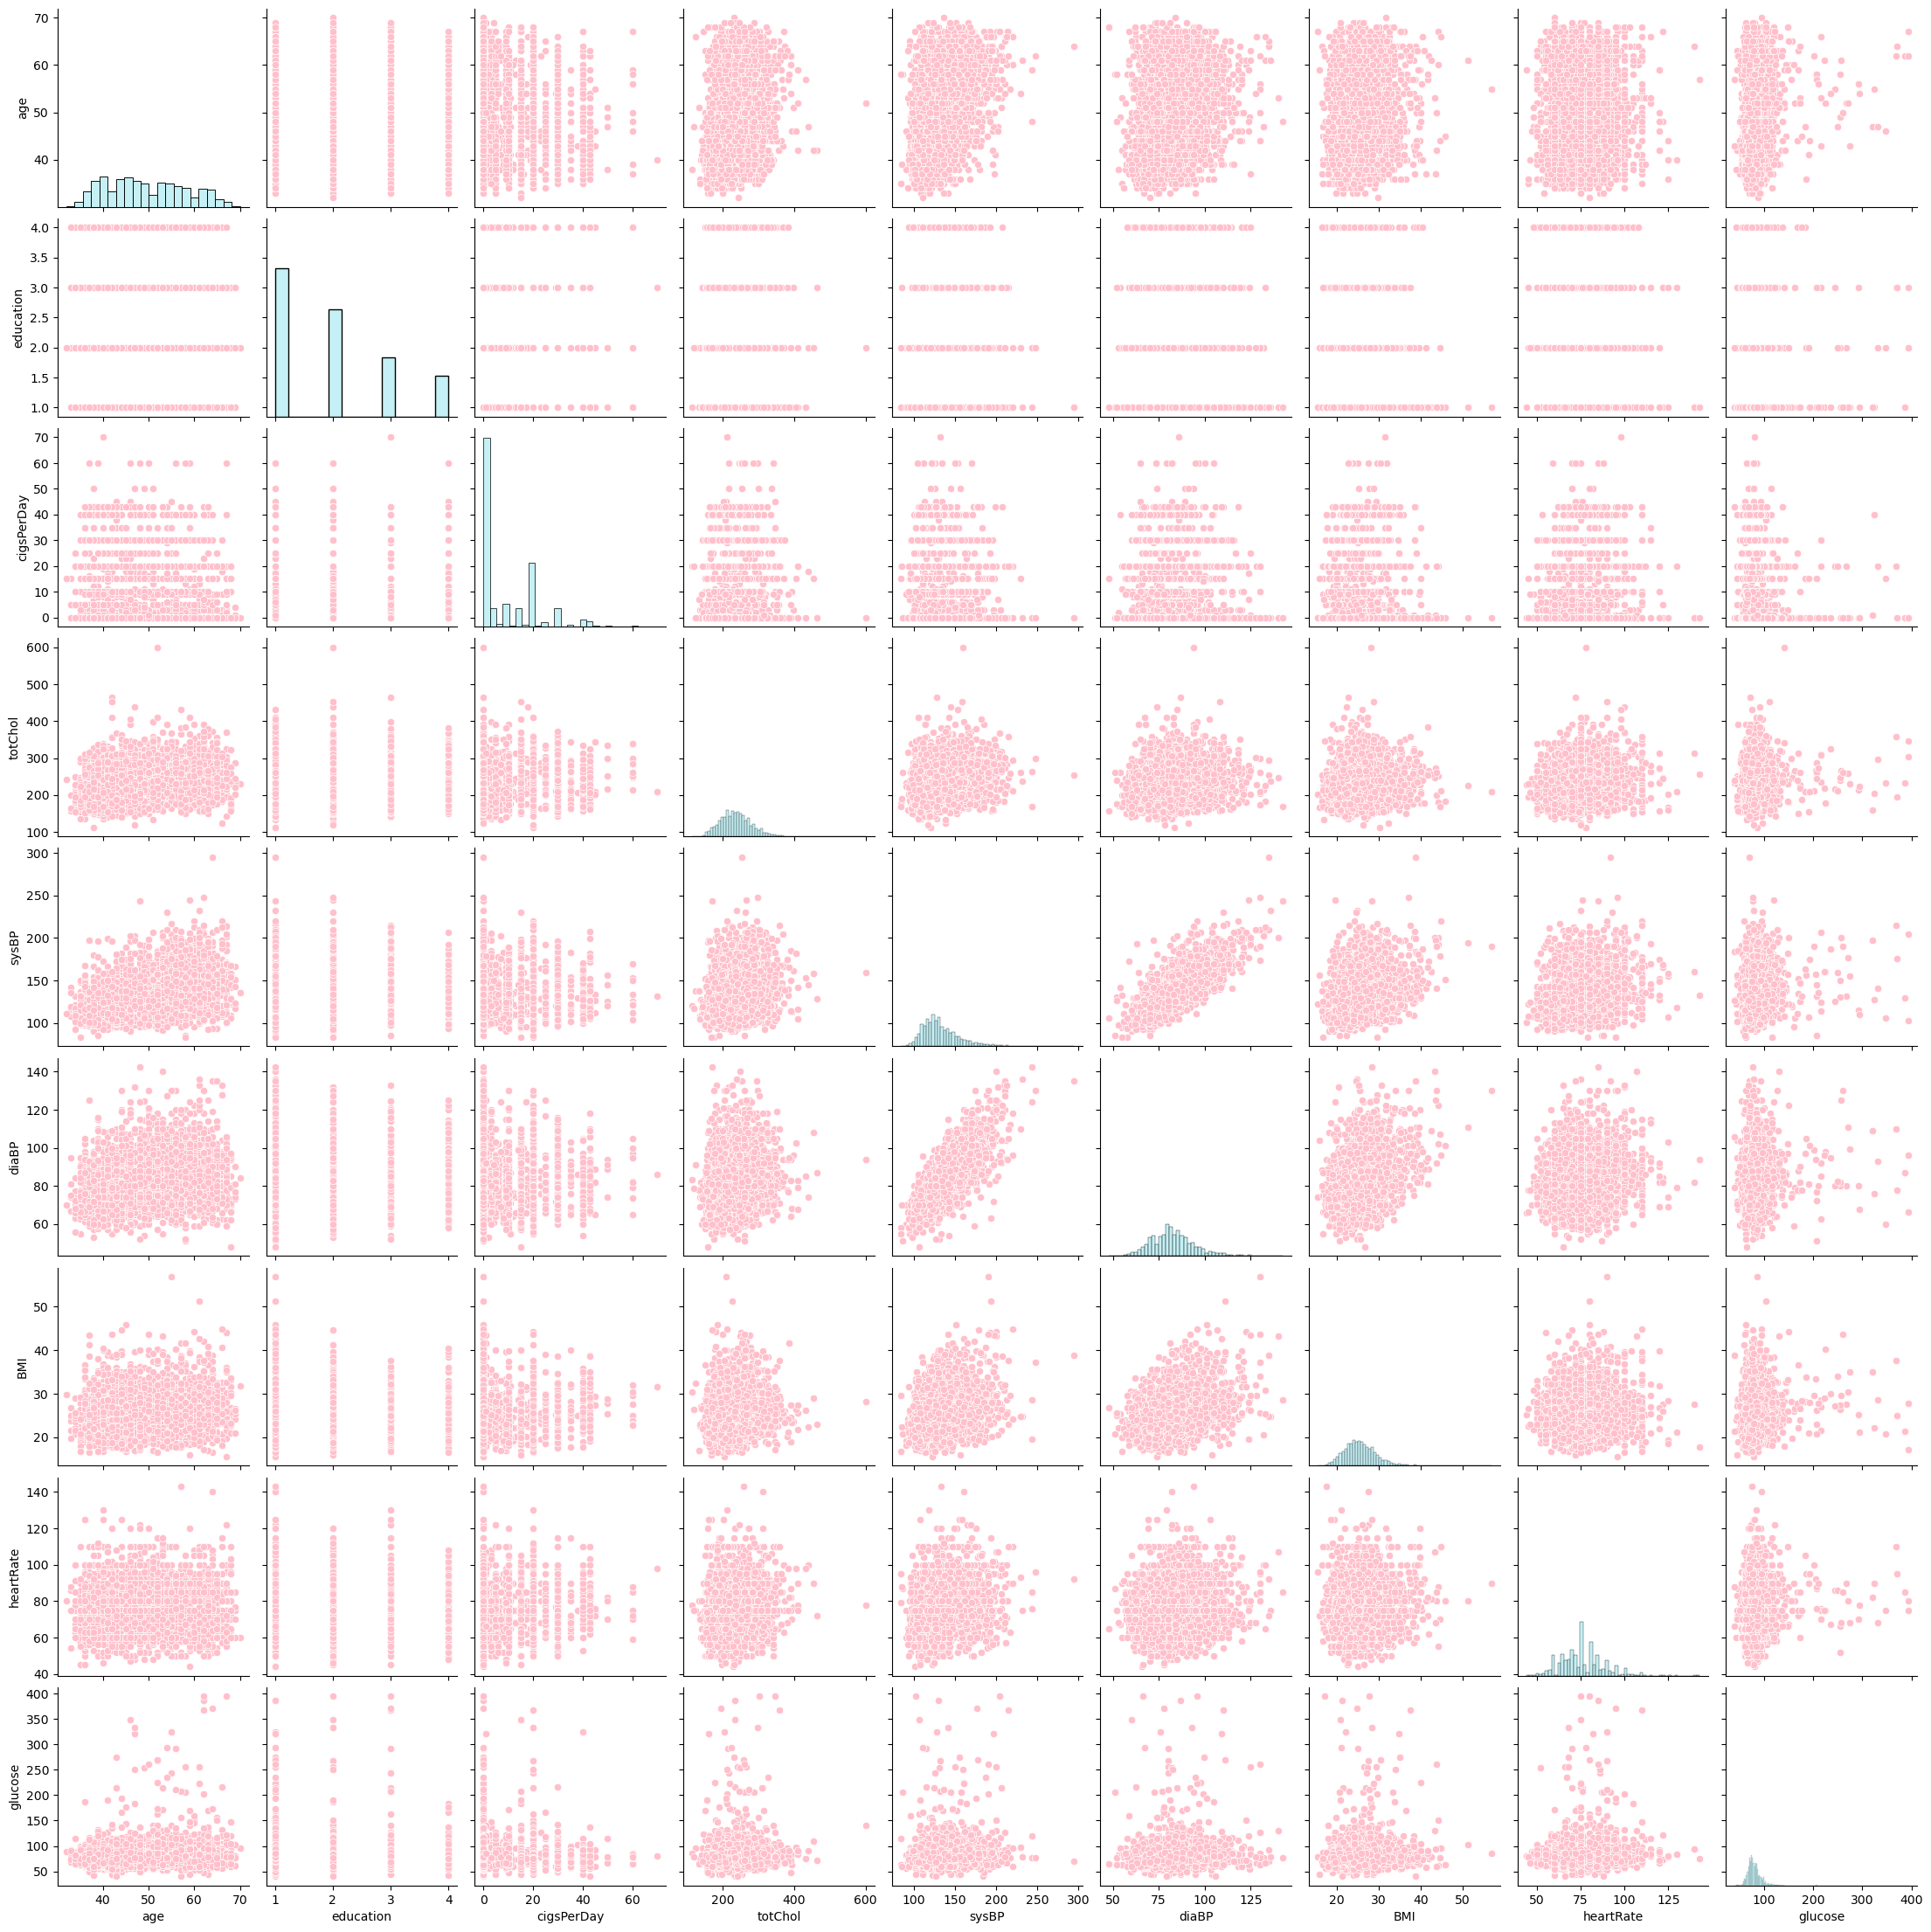

In [498]:
# Se explora gráficamente a través de Pairplot el DataFrame sin nulos
sns.pairplot(df_sin_nulos, diag_kind='hist', plot_kws={'color':'#FFC0CB'}, diag_kws={'color':'#B2EBF2'})

<span style="font-size:15px;">Los 09 campos int64 o float64 han sido graficados en Pairplot para comprender visualmente todas las combinaciones posibles de pares de variables en el conjunto de datos del DataFrame donde se han eliminado todas las filas con datos nulos. Para los gráficos diagonales en celeste se han escogido histogramas<br>
Se escogerán las siguientes 3 variables cuantitativas:<br>
1. Age
2. cigsPerDay
3. sysBP

In [500]:
# Se seleccionan 3 variables
seleccion_3 = ['age', 'sysBP', 'cigsPerDay']

Text(0.5, 1.02, 'PairPlot de Variables Seleccionadas Separadas por Sexo')

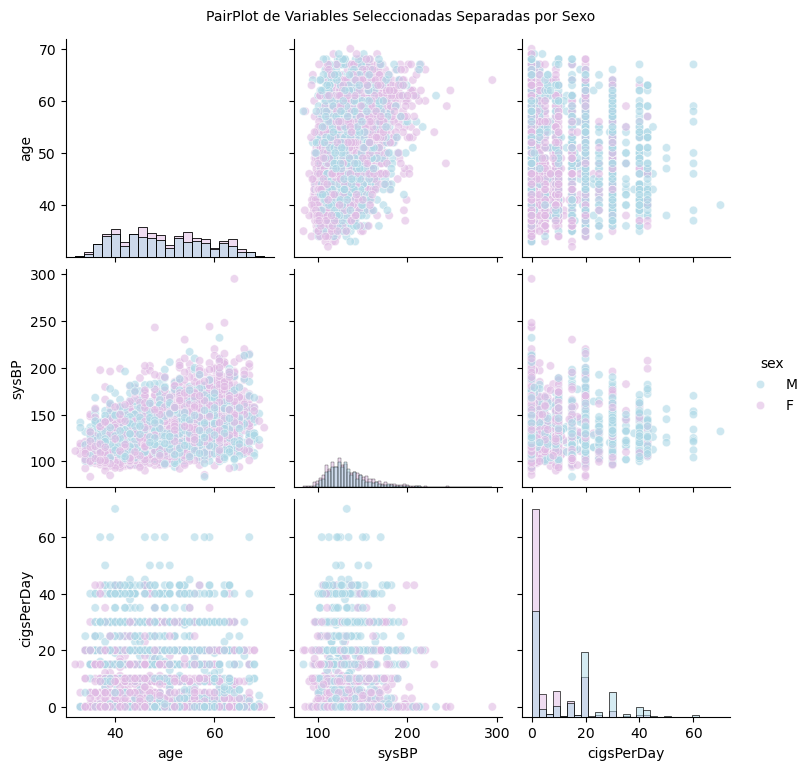

In [501]:
# Se explora gráficamente a través de Pairplot el DataFrame más acotado en columnas diferenciando por sex
sns.pairplot(
    df_sin_nulos[seleccion_3 + ['sex']],
    diag_kind='hist',
    hue = 'sex',
    palette =colores_base,
    plot_kws={'alpha':0.6},
    diag_kws={'fill': True}
)
plt.suptitle('PairPlot de Variables Seleccionadas Separadas por Sexo', fontsize=10, y=1.02)


Text(0.5, 1.02, 'PairPlot de Variables Seleccionadas Separadas por Si Paciente a Tomado o No Medicamentos para Presión Aterial')

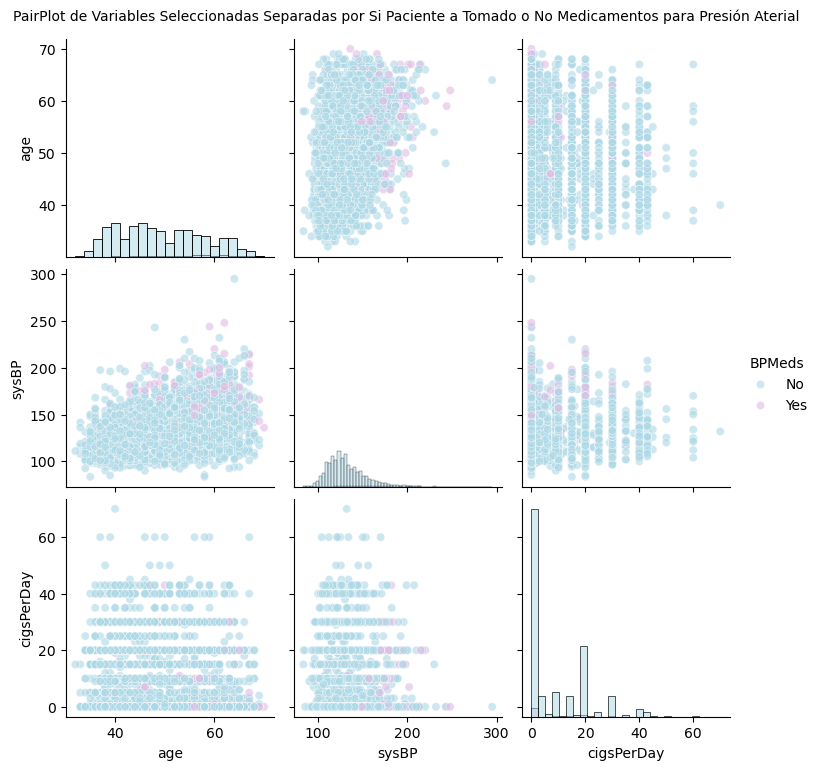

In [502]:
# Se explora gráficamente a través de Pairplot el DataFrame más acotado en columnas diferenciando por BPMeds
sns.pairplot(
    df_sin_nulos[seleccion_3 + ['BPMeds']],
    diag_kind='hist',
    hue = 'BPMeds',
    palette =colores_base,
    plot_kws={'alpha':0.6},
    diag_kws={'fill': True}
)
plt.suptitle('PairPlot de Variables Seleccionadas Separadas por Si Paciente a Tomado o No Medicamentos para Presión Aterial', fontsize=10, y=1.02)


Text(0.5, 1.02, 'PairPlot de Variables Seleccionadas Separadas por Si Paciente a Tenido o No Previamente Accidente Cerebro Vascular')

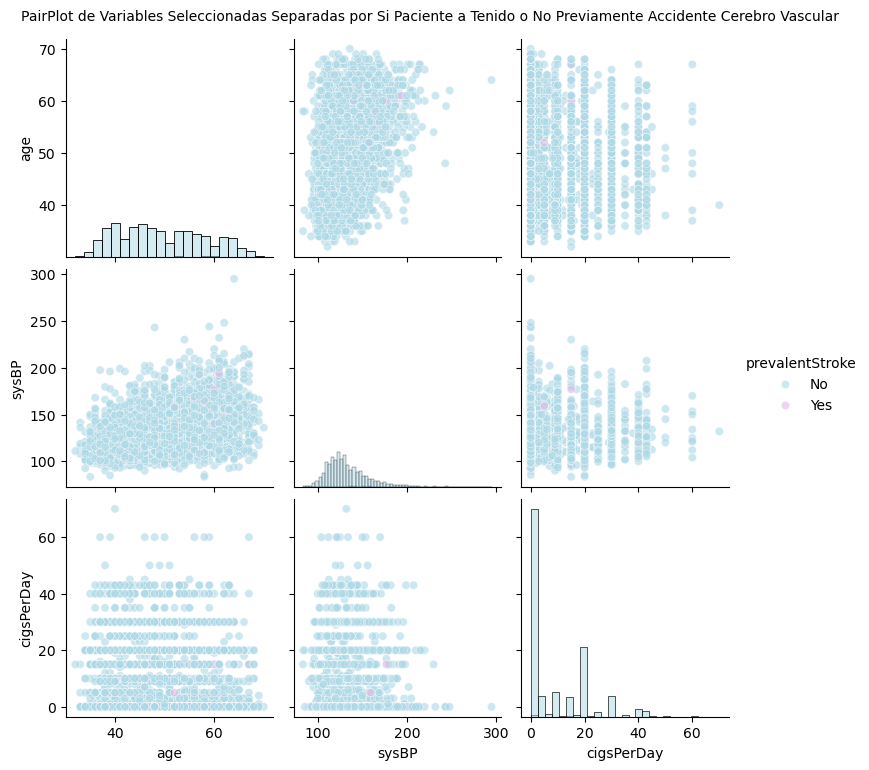

In [503]:
# Se explora gráficamente a través de Pairplot el DataFrame más acotado en columnas diferenciando por prevalentStroke
sns.pairplot(
    df_sin_nulos[seleccion_3 + ['prevalentStroke']],
    diag_kind='hist',
    hue = 'prevalentStroke',
    palette =colores_base,
    plot_kws={'alpha':0.6},
    diag_kws={'fill': True}
)
plt.suptitle('PairPlot de Variables Seleccionadas Separadas por Si Paciente a Tenido o No Previamente Accidente Cerebro Vascular', fontsize=10, y=1.02)


Text(0.5, 1.02, 'PairPlot de Variables Seleccionadas Separadas por Si Paciente es o No Hipertenso')

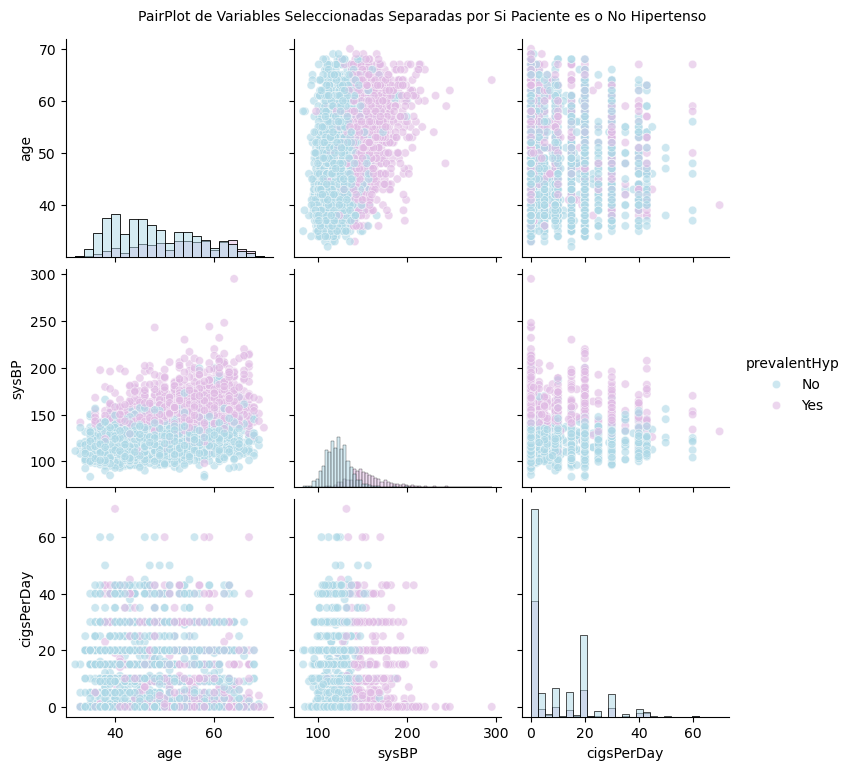

In [504]:
# Se explora gráficamente a través de Pairplot el DataFrame más acotado en columnas diferenciando por prevalentHyp
sns.pairplot(
    df_sin_nulos[seleccion_3 + ['prevalentHyp']],
    diag_kind='hist',
    hue = 'prevalentHyp',
    palette =colores_base,
    plot_kws={'alpha':0.6},
    diag_kws={'fill': True}
)
plt.suptitle('PairPlot de Variables Seleccionadas Separadas por Si Paciente es o No Hipertenso', fontsize=10, y=1.02)

Text(0.5, 1.02, 'PairPlot de Variables Seleccionadas Separadas por Si Paciente Tenía o No Diabetes')

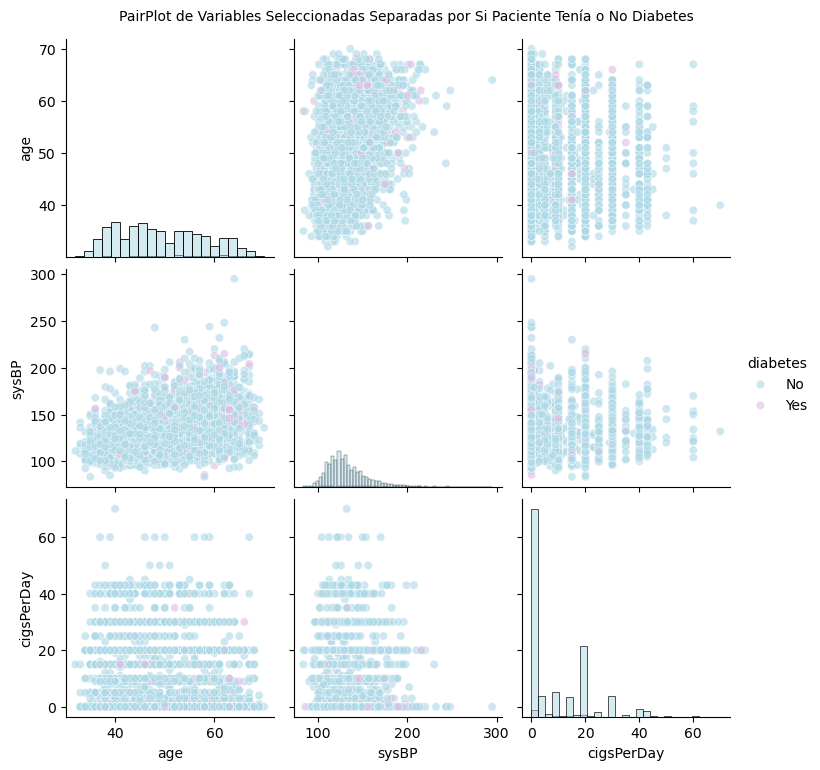

In [505]:
# Se explora gráficamente a través de Pairplot el DataFrame más acotado en columnas diferenciando por diabetes
sns.pairplot(
    df_sin_nulos[seleccion_3 + ['diabetes']],
    diag_kind='hist',
    hue = 'diabetes',
    palette =colores_base,
    plot_kws={'alpha':0.6},
    diag_kws={'fill': True}
)
plt.suptitle('PairPlot de Variables Seleccionadas Separadas por Si Paciente Tenía o No Diabetes', fontsize=10, y=1.02)

Text(0.5, 1.02, 'PairPlot de Variables Seleccionadas Separadas por Si Paciente Sufrió o No Enfermedad Coronaria en los Últimos 10 Años')

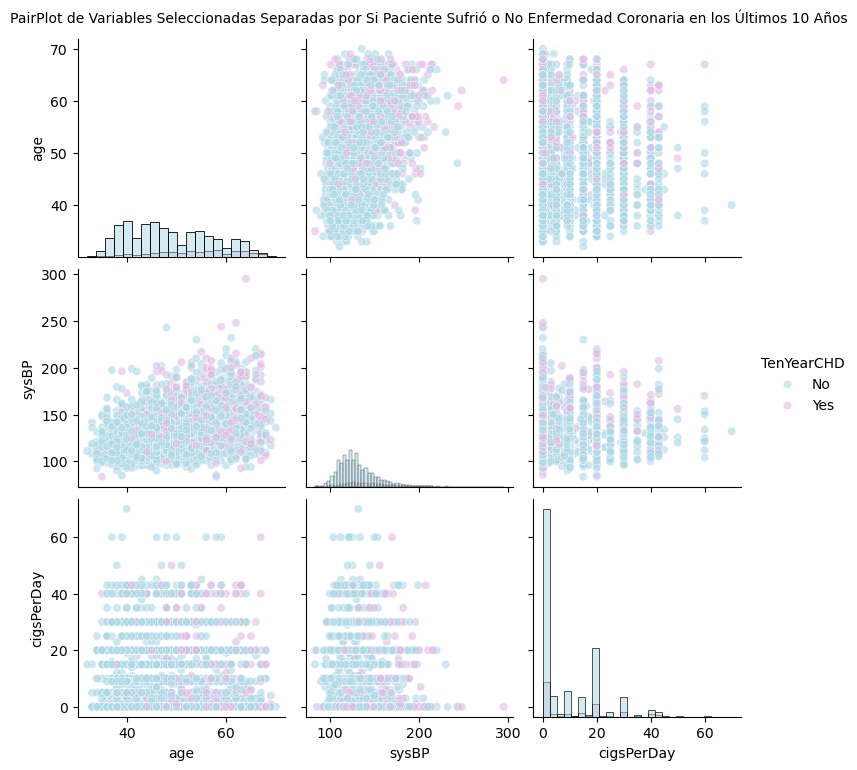

In [506]:
# Se explora gráficamente a través de Pairplot el DataFrame más acotado en columnas diferenciando por TenYearCHD
sns.pairplot(
    df_sin_nulos[seleccion_3 + ['TenYearCHD']],
    diag_kind='hist',
    hue = 'TenYearCHD',
    palette =colores_base,
    plot_kws={'alpha':0.6},
    diag_kws={'fill': True}
)
plt.suptitle('PairPlot de Variables Seleccionadas Separadas por Si Paciente Sufrió o No Enfermedad Coronaria en los Últimos 10 Años', fontsize=10, y=1.02)

In [507]:
# Se calculan estadísticas descriptivas
estadisticas = df_sin_nulos[variables].describe().T
estadisticas['varianza'] = df_sin_nulos[variables].var()

print(estadisticas)

TypeError: could not convert string to float: 'No'

<span style="font-size:15px;">Entre: age, sysBP, cigsPerDay, la variable con mayor desviación estándar y mayor varianza es la que presenta mayor dispersión. Siendo sysBP la que cumple con ambos requisitos <br>

In [ ]:
# Histogramas para cada variable
plt.figure(figsize=(15, 5))
for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df_sin_nulos[seleccion_3 + ['sex']], x=var, hue='sex', palette=['#4682B4', '#FF69B4'], kde=True)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [ ]:
# Histogramas para cada variable
plt.figure(figsize=(15, 5))
for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df_sin_nulos[seleccion_3 + ['BPMeds']], x=var, hue='BPMeds', palette=['#4682B4', '#FF69B4'], kde=True)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [ ]:
# Histogramas para cada variable
plt.figure(figsize=(15, 5))
for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df_sin_nulos[seleccion_3 + ['prevalentStroke']], x=var, hue='prevalentStroke', palette=['#4682B4', '#FF69B4'], kde=True)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [ ]:
# Histogramas para cada variable
plt.figure(figsize=(15, 5))
for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df_sin_nulos[seleccion_3 + ['prevalentHyp']], x=var, hue='prevalentHyp', palette=['#4682B4', '#FF69B4'], kde=True)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [ ]:
# Histogramas para cada variable
plt.figure(figsize=(15, 5))
for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df_sin_nulos[seleccion_3 + ['diabetes']], x=var, hue='diabetes', palette=['#4682B4', '#FF69B4'], kde=True)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [ ]:
# Histogramas para cada variable
plt.figure(figsize=(15, 5))
for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df_sin_nulos[seleccion_3 + ['TenYearCHD']], x=var, hue='TenYearCHD', palette=['#4682B4', '#FF69B4'], kde=True)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [ ]:
# Copia del DataFrame original sin nulos
df_limpio = df_sin_nulos.copy()

# Seleccionar solo columnas numéricas
columnas_numericas = df_sin_nulos.select_dtypes(include=[np.number]).columns

# Filtrar outliers usando IQR en todas las variables
for col in columnas_numericas:
    Q1 = df_sin_nulos[col].quantile(0.25)
    Q3 = df_sin_nulos[col].quantile(0.75)
    IQR = Q3 - Q1  # Rango intercuartílico

    # Definir límites
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR

    # Aplicar filtro en el DataFrame limpio
    df_limpio = df_limpio[(df_limpio[col] >= lim_inf) & (df_limpio[col] <= lim_sup)]

# Mostrar el número de filas antes y después de la limpieza
print(f"Filas antes de limpiar outliers: {df_base.shape[0]}")
print(f"Filas después de limpiar nulos: {df_sin_nulos.shape[0]}")
print(f"Filas después de limpiar outliers: {df_limpio.shape[0]}")

# Crear una figura con dos filas de gráficos
fig, axes = plt.subplots(2, len(variables), figsize=(15, 10))

# Gráficos antes de la limpieza (fila superior)
for i, var in enumerate(variables):
    sns.boxplot(data=df_base, x='prevalentHyp', y=var, palette=['#4682B4', '#FF69B4'], ax=axes[0, i])
    axes[0, i].set_title(f'Antes de la limpieza - {var}')

# Gráficos después de la limpieza (fila inferior)
for i, var in enumerate(variables):
    sns.boxplot(data=df_limpio, x='prevalentHyp', y=var, palette=['#4682B4', '#FF69B4'], ax=axes[1, i])
    axes[1, i].set_title(f'Después de la limpieza - {var}')

# Ajustar espaciado entre gráficos
plt.tight_layout()
plt.show()


<span style="color:#87CEEB; font-size:20px; font-weight:bold;">4.</span>
<span style="font-size:15px;">¿Qué variables cuantitativas presentan mayor correlación? Explica.</span><br>

In [ ]:
# Seleccionar solo las columnas numéricas
df_numericas = df_limpio.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
matriz_corr = df_numericas.corr()

# Visualizar con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap=paleta_gradual, fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Cuantitativas")
plt.show()

<span style="font-size:15px;">Las variables que más correlación presentan son:<br>
Presión arterial sistólica y presión arterial diastólica sostienen una correlación moderada positiva alta de 0.76<br>
Seguida por edad y presión arterial sistólica también positiva baja a moderada de 0.37<br>
</span><br>

<span style="color:#87CEEB; font-size:20px; font-weight:bold;">5.</span>
<span style="font-size:15px;">Si de este dataset se escoge un paciente al azar, ¿cuál es la probabilidad de que sea
hombre, si se sabe que pertenece al mayor cuartil de la variable correspondiente al
índice de masa corporal?</span><br>

In [ ]:
# Probabilidad que el paciente al azar sea hombre
prob_hombre = (df_base['sex'] == 'M').mean()
print(f'La probabilidad de que un paciente al azar sea hombre es de: {prob_hombre:.2%}')

# Calcular el cuartil 75 de BMI
cuartil_75 = df_base['BMI'].quantile(0.75)

# Filtrar pacientes en el mayor cuartil de BMI
pacientes_mayor_cuartil = df_base[df_base['BMI'] >= cuartil_75]

# Calcular la probabilidad de que un paciente en este cuartil sea hombre
prob_hombre_dado_mayor_cuartil = (pacientes_mayor_cuartil['sex'] == 'M').mean()
print(f'La probabilidad de que un paciente esté en el mayor cuartil de BMI y sea hombre es de: {prob_hombre_dado_mayor_cuartil:.2%}')


<span style="color:#87CEEB; font-size:20px; font-weight:bold;">6.</span>
<span style="font-size:15px;">¿Es razonable afirmar que, para una persona cualquiera (no necesariamente dentro
del dataset), su ritmo cardiaco promedio es 75? Explica y justifica.</span><br>

In [ ]:
df_limpio.describe()

<span style="font-size:15px;">Haciendo un análisis muy simplificado podemos ver que una persona cualquiera puede tener desde meses hasta más de 100 años de edad. Este set de datos recopila información de personas entre 32 y 70 años. Por lo tanto y a pesar que el promedio de ritmo cardiaco de este grupo de datos es 74,57 no es razonable extrapolarlo a la población mundial</span><br>

In [ ]:
# Tamaño del dataset
print(f"Número de registros: {df_limpio.shape[0]}")

# Promedio y desviación estándar del ritmo cardíaco
print(f"Media del ritmo cardíaco: {df_limpio['heartRate'].mean():.2f}")
print(f"Desviación estándar: {df_limpio['heartRate'].std():.2f}")

# Distribución de ritmo cardíaco
plt.figure(figsize=(10, 5))
sns.histplot(df_limpio['heartRate'], bins=30, kde=True, color='#FFC0CB')
plt.axvline(df_limpio['heartRate'].mean(), color='red', linestyle='--', label=f'Media: {df_limpio["heartRate"].mean():.2f}')
plt.title("Distribución del Ritmo Cardíaco")
plt.xlabel("Ritmo Cardíaco")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

# Proporción de sexos
print("Distribución por género:")
print(df_limpio['sex'].value_counts(normalize=True) * 100)

# Prevalencia de hipertensión
print("Prevalencia de hipertensión en la muestra:")
print(df_limpio['prevalentHyp'].value_counts(normalize=True) * 100)


In [ ]:
# Definir parámetros de la prueba
mu_0 = 75  # Hipótesis nula: media poblacional esperada

# Calcular estadísticos
sample_mean = np.mean(df_limpio['heartRate'])
sample_std = np.std(df_limpio['heartRate'], ddof=1)
n = len(df_limpio['heartRate'])

# Prueba t para una muestra
t_stat, p_value = stats.ttest_1samp(df_limpio['heartRate'], mu_0)

# Mostrar resultados
print(f"Media muestral: {sample_mean:.2f}")
print(f"Desviación estándar muestral: {sample_std:.2f}")
print(f"Tamaño de la muestra: {n}")
print(f"Estadístico t: {t_stat:.3f}")
print(f"Valor p: {p_value:.5f}")

# Interpretación del resultado
alpha = 0.05  # Nivel de significancia

if p_value < alpha:
    print("Rechazamos la hipótesis nula: El ritmo cardíaco promedio es significativamente diferente de 75")
else:
    print("No tenemos suficiente evidencia para rechazar la hipótesis nula: El ritmo cardíaco promedio podría ser 75")


<span style="color:#87CEEB; font-size:20px; font-weight:bold;">7.</span>
<span style="font-size:15px;">Ser hombre, ¿influye en el promedio de cigarrillos consumidos por día, dentro de los
pacientes fumadores? Explica.</span><br>

<span style="font-size:15px;">Gráficamente y estadísticamente se puede afirmar que sí existe diferencia de género entre los cigarrillos fumados por día. Un ejemplo sencillo es observar los promedio por género: 14 diarios en el grupo femenino y casi 22 en el grupo masculino. Siendo el promedio del grupo de ambos géneros 9<br>
El estadístico mide cuántas desviaciones estandar la media de la muestra se aleja de la media poblacional. En este caso el estadístico es de 16,5 lo que significa que la media muestreal está a 16,5 desviaciones estándar de la media hipotética lo que en terminos relativos es una valor alto  </span><br>

In [520]:
# Filtrar los pacientes fumadores
fumadores = df_limpio[df_limpio['currentSmoker'] == 'Yes']

# Calcular el promedio de cigarrillos por día por género
promedio_cigarrillos = fumadores.groupby('sex')['cigsPerDay'].mean()

# Mostrar el resultado
print(promedio_cigarrillos)

sex
F    13.930398
M    21.932571
Name: cigsPerDay, dtype: float64


In [522]:
# Filtrar los pacientes fumadores
fumadores = df_limpio[df_limpio['currentSmoker'] == 'Yes']

# Agrupar a los fumadores por sexo y obtener los valores de cigarrillos por día
fumadores_hombres = fumadores[fumadores['sex'] == 'M']['cigsPerDay']
fumadores_mujeres = fumadores[fumadores['sex'] == 'F']['cigsPerDay']

# Realizar la prueba t de Student para dos muestras independientes
t_stat, p_value = stats.ttest_ind(fumadores_hombres, fumadores_mujeres, nan_policy='omit')

# Mostrar resultados
print(f"Estadístico t: {t_stat:.3f}")
print(f"Valor p: {p_value:.5f}")

# Interpretación del resultado
alpha = 0.05  # Nivel de significancia

if p_value < alpha:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa en el promedio de cigarrillos consumidos por día entre hombres y mujeres.")
else:
    print("No tenemos suficiente evidencia para rechazar la hipótesis nula: No hay una diferencia significativa en el promedio de cigarrillos consumidos por día entre hombres y mujeres.")


Estadístico t: 16.564
Valor p: 0.00000
Rechazamos la hipótesis nula: Hay una diferencia significativa en el promedio de cigarrillos consumidos por día entre hombres y mujeres.


Text(0.5, 1.02, 'PairPlot de Variables Seleccionadas Separadas por Sexo')

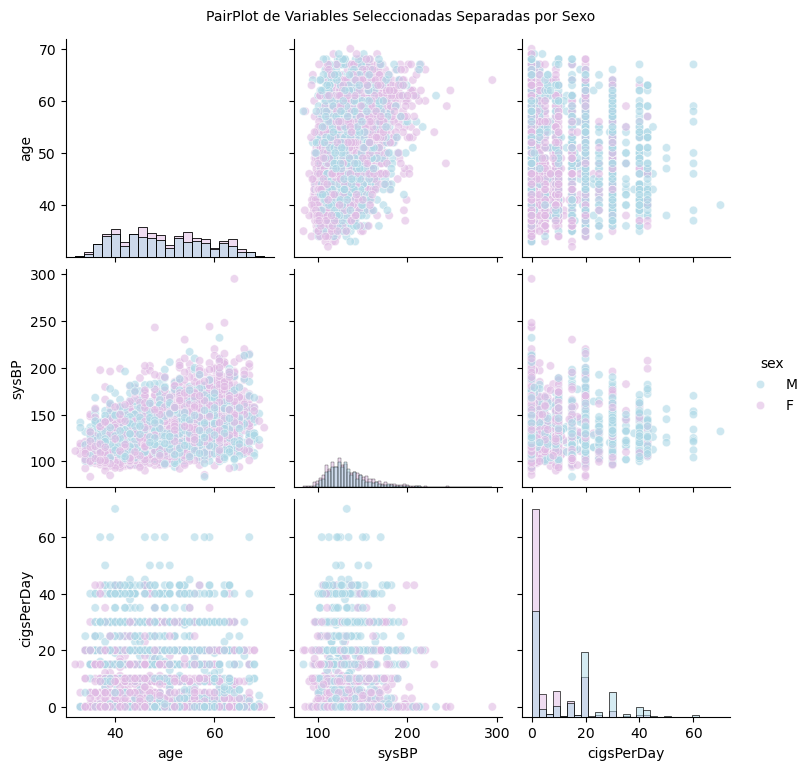

In [524]:
# Se explora gráficamente a través de Pairplot el DataFrame más acotado en columnas diferenciando por sex
sns.pairplot(
    df_sin_nulos[seleccion_3 + ['sex']],
    diag_kind='hist',
    hue = 'sex',
    palette =colores_base,
    plot_kws={'alpha':0.6},
    diag_kws={'fill': True}
)
plt.suptitle('PairPlot de Variables Seleccionadas Separadas por Sexo', fontsize=10, y=1.02)

<span style="color:#87CEEB; font-size:20px; font-weight:bold;">8.</span>
<span style="font-size:15px;">Construye un modelo de regresión lineal que permita relacionar 6 variables del
dataset con el índice de masa corporal. (Debes incluir al menos dos variables
cualitativas). Evalúa tu modelo y explica.</span><br>

<span style="font-size:15px;">La edad tiene un coeficiente negativo, lo que sugiere que a medida que la edad aumenta, el IMC tiende a disminuir ligeramente. El número de cigarrillos consumidos por día tiene un coeficiente negativo, lo que sugiere que, en general, consumir más cigarrillos por día podría estar asociado con una ligera disminución en el IMC, aunque este efecto no es muy grande.  El colesterol total tiene un coeficiente positivo, lo que implica que a medida que los niveles de colesterol total aumentan, el IMC tiende a aumentar ligeramente. La presión sistólica tiene un coeficiente positivo, lo que sugiere que un aumento en la presión sistólica está asociado con un aumento en el IMC, aunque el efecto es pequeño. Esta variable cualitativa (codificada como 0 y 1) tiene un coeficiente negativo significativo, lo que sugiere que las personas con diabetes tienden a tener un IMC más bajo que aquellas sin diabetes. El género también es una variable cualitativa (0 = mujeres, 1 = hombres). Este coeficiente positivo indica que los hombres tienden a tener un IMC más alto en promedio que las mujeres en el dataset. El intercepto es 17.26, lo que significa que, en el modelo, si todas las variables predictoras fueran 0 (lo que es improbable en la vida real), el valor del IMC sería 17.26. Este valor no tiene un gran significado práctico, pero es parte del modelo matemático. En promedio, el modelo está desviado en 2.72 unidades de IMC respecto a los valores reales. Un MAE de 2.72 es relativamente bajo y sugiere que el modelo no tiene un error completamente grande, pero aún puede mejorarse. Aunque el modelo tiene algunos coeficientes con sentido, la baja R² indica que no está explicando bien la variabilidad del IMC. Esto podría deberse a que: Faltan variables relevantes: Hay otras variables no consideradas que podrían tener una mayor influencia sobre el IMC. Relación no lineal: La relación entre las variables y el IMC podría no ser lineal. En este caso, podría considerarse el uso de modelos no lineales o transformaciones en las variables.  Problemas con los datos: Podría haber problemas de multicolinealidad o datos atípicos que estén afectando la precisión del modelo.
En general, el modelo tiene cierto valor predictivo, pero sería recomendable probar otros enfoques (como la inclusión de más variables o el uso de modelos no lineales) para mejorar la capacidad de predicción del IMC.

In [530]:
# 1. Seleccionar las variables: escogemos 6 variables (2 cualitativas y 4 cuantitativas)
variables = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diabetes', 'sex', 'BMI']
df_seleccion = df_limpio[variables]

# 2. Codificar las variables cualitativas (diabetes, sex)
label_encoder = LabelEncoder()
df_seleccion['sex'] = label_encoder.fit_transform(df_seleccion['sex'])
df_seleccion['diabetes'] = label_encoder.fit_transform(df_seleccion['diabetes'])

# 3. Definir las variables independientes (X) y la variable dependiente (y)
X = df_seleccion.drop('BMI', axis=1)  # Las 5 variables predictoras
y = df_seleccion['BMI']  # La variable a predecir

# 4. Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Crear el modelo de regresión lineal
modelo = LinearRegression()

# 6. Entrenar el modelo
modelo.fit(X_train, y_train)

# 7. Hacer predicciones
y_pred = modelo.predict(X_test)

# 8. Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Mostrar los resultados
print(f"Coeficientes: {modelo.coef_}")
print(f"Intercepto: {modelo.intercept_}")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"R²: {r2:.4f}")


Coeficientes: [-0.00475928 -0.03757929  0.00839652  0.04736833 -0.62249422  1.34596465]
Intercepto: 17.258788863422833
Error Absoluto Medio (MAE): 2.72
Raíz del Error Cuadrático Medio (RMSE): 3.38
R²: 0.1077


<span style="color:#87CEEB; font-size:20px; font-weight:bold;">9.</span>
<span style="font-size:15px;">Construye un modelo de regresión logística para predecir el riesgo de sufrir una
enfermedad coronaria en los próximos diez años, a partir de las variables descritas.
Verifica el balanceo de datos y evalúa tu modelo.</span><br>

In [541]:


# Definir las variables predictoras (X) y la variable objetivo (y)
X = df_balanced.drop('TenYearCHD', axis=1)  # Variables predictoras
y = df_balanced['TenYearCHD']  # Variable objetivo

# Convertir las variables categóricas a variables dummy (si las tienes)
X = pd.get_dummies(X, drop_first=True)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de regresión logística
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
print(f"Precisión del modelo: {accuracy_score(y_test, y_pred):.4f}")
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))



Precisión del modelo: 0.6775
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.71      0.65      0.68       868
           1       0.65      0.71      0.68       794

    accuracy                           0.68      1662
   macro avg       0.68      0.68      0.68      1662
weighted avg       0.68      0.68      0.68      1662

Matriz de confusión:
 [[562 306]
 [230 564]]


<span style="color:#87CEEB; font-size:20px; font-weight:bold;">10.</span>
<span style="font-size:15px;">Separa los modelos de regresión anteriores en dos distintos, respectivamente,
considerando alguna variable categórica. Compara y concluye.</span><br>

In [551]:
#  Regresión lineal separada por sexo

# Filtramos los datos por sexo
df_men = df_limpio[df_limpio['sex'] == 'M']
df_women = df_limpio[df_limpio['sex'] == 'F']

# Variables predictoras
X_men = df_men[['age', 'education', 'cigsPerDay', 'sysBP', 'diaBP', 'totChol']]
y_men = df_men['BMI']

X_women = df_women[['age', 'education', 'cigsPerDay', 'sysBP', 'diaBP', 'totChol']]
y_women = df_women['BMI']

# Crear modelos de regresión lineales para hombres y mujeres
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Para hombres
X_train_men, X_test_men, y_train_men, y_test_men = train_test_split(X_men, y_men, test_size=0.2, random_state=42)
model_men = LinearRegression()
model_men.fit(X_train_men, y_train_men)
y_pred_men = model_men.predict(X_test_men)

# Evaluar el modelo para hombres
mae_men = mean_absolute_error(y_test_men, y_pred_men)
rmse_men = mean_squared_error(y_test_men, y_pred_men, squared=False)
r2_men = model_men.score(X_test_men, y_test_men)

print("Modelo de regresión para hombres:")
print(f"MAE: {mae_men:.2f}, RMSE: {rmse_men:.2f}, R²: {r2_men:.2f}")

# Para mujeres
X_train_women, X_test_women, y_train_women, y_test_women = train_test_split(X_women, y_women, test_size=0.2, random_state=42)
model_women = LinearRegression()
model_women.fit(X_train_women, y_train_women)
y_pred_women = model_women.predict(X_test_women)

# Evaluar el modelo para mujeres
mae_women = mean_absolute_error(y_test_women, y_pred_women)
rmse_women = mean_squared_error(y_test_women, y_pred_women, squared=False)
r2_women = model_women.score(X_test_women, y_test_women)

print("\nModelo de regresión para mujeres:")
print(f"MAE: {mae_women:.2f}, RMSE: {rmse_women:.2f}, R²: {r2_women:.2f}")


Modelo de regresión para hombres:
MAE: 2.42, RMSE: 3.06, R²: 0.09

Modelo de regresión para mujeres:
MAE: 2.64, RMSE: 3.30, R²: 0.19


In [553]:
# Regresión Lineal Separada para Fumadores
# Filtramos los datos por fumadores
df_smokers = df_limpio[df_limpio['currentSmoker'] == 'Yes']
df_non_smokers = df_limpio[df_limpio['currentSmoker'] == 'No']

# Variables predictoras
X_smokers = df_smokers[['age', 'education', 'cigsPerDay', 'sysBP', 'diaBP', 'totChol']]
y_smokers = df_smokers['BMI']

X_non_smokers = df_non_smokers[['age', 'education', 'cigsPerDay', 'sysBP', 'diaBP', 'totChol']]
y_non_smokers = df_non_smokers['BMI']

# Crear modelos de regresión lineales para fumadores y no fumadores
# Para fumadores
X_train_smokers, X_test_smokers, y_train_smokers, y_test_smokers = train_test_split(X_smokers, y_smokers, test_size=0.2, random_state=42)
model_smokers = LinearRegression()
model_smokers.fit(X_train_smokers, y_train_smokers)
y_pred_smokers = model_smokers.predict(X_test_smokers)

# Evaluar el modelo para fumadores
mae_smokers = mean_absolute_error(y_test_smokers, y_pred_smokers)
rmse_smokers = mean_squared_error(y_test_smokers, y_pred_smokers, squared=False)
r2_smokers = model_smokers.score(X_test_smokers, y_test_smokers)

print("Modelo de regresión para fumadores:")
print(f"MAE: {mae_smokers:.2f}, RMSE: {rmse_smokers:.2f}, R²: {r2_smokers:.2f}")

# Para no fumadores
X_train_non_smokers, X_test_non_smokers, y_train_non_smokers, y_test_non_smokers = train_test_split(X_non_smokers, y_non_smokers, test_size=0.2, random_state=42)
model_non_smokers = LinearRegression()
model_non_smokers.fit(X_train_non_smokers, y_train_non_smokers)
y_pred_non_smokers = model_non_smokers.predict(X_test_non_smokers)

# Evaluar el modelo para no fumadores
mae_non_smokers = mean_absolute_error(y_test_non_smokers, y_pred_non_smokers)
rmse_non_smokers = mean_squared_error(y_test_non_smokers, y_pred_non_smokers, squared=False)
r2_non_smokers = model_non_smokers.score(X_test_non_smokers, y_test_non_smokers)

print("\nModelo de regresión para no fumadores:")
print(f"MAE: {mae_non_smokers:.2f}, RMSE: {rmse_non_smokers:.2f}, R²: {r2_non_smokers:.2f}")


Modelo de regresión para fumadores:
MAE: 2.48, RMSE: 3.14, R²: 0.13

Modelo de regresión para no fumadores:
MAE: 2.56, RMSE: 3.18, R²: 0.14
